In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [18]:
# Load dataset
df = pd.read_csv('music_dataset.csv')

In [19]:
# Meta Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [20]:
df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [23]:
# Removes all missing values
df = df.dropna()
print(df.isnull().sum())  # Should show all zeros

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


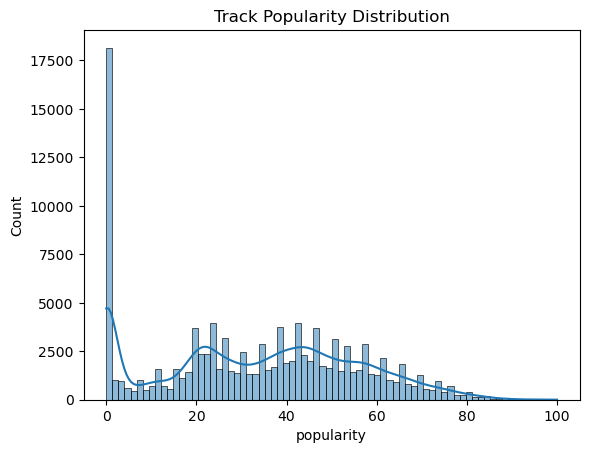

In [24]:
# Distribution of target variable
df.drop('Unnamed: 0', axis=1, inplace=True) #  Drop the column 'Unnamed'
sns.histplot(df['popularity'], kde=True)
plt.title('Track Popularity Distribution')
plt.show()

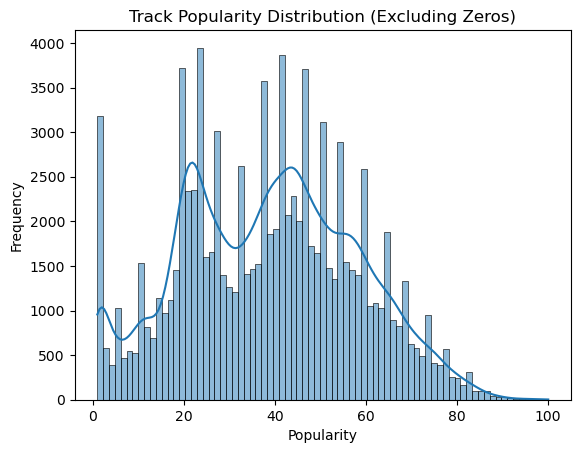

In [26]:
# Remove tracks with popularity = 0
df = df[df['popularity'] > 0]

# Plot the distribution of the target variable
sns.histplot(df['popularity'], kde=True)
plt.title('Track Popularity Distribution (Excluding Zeros)')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

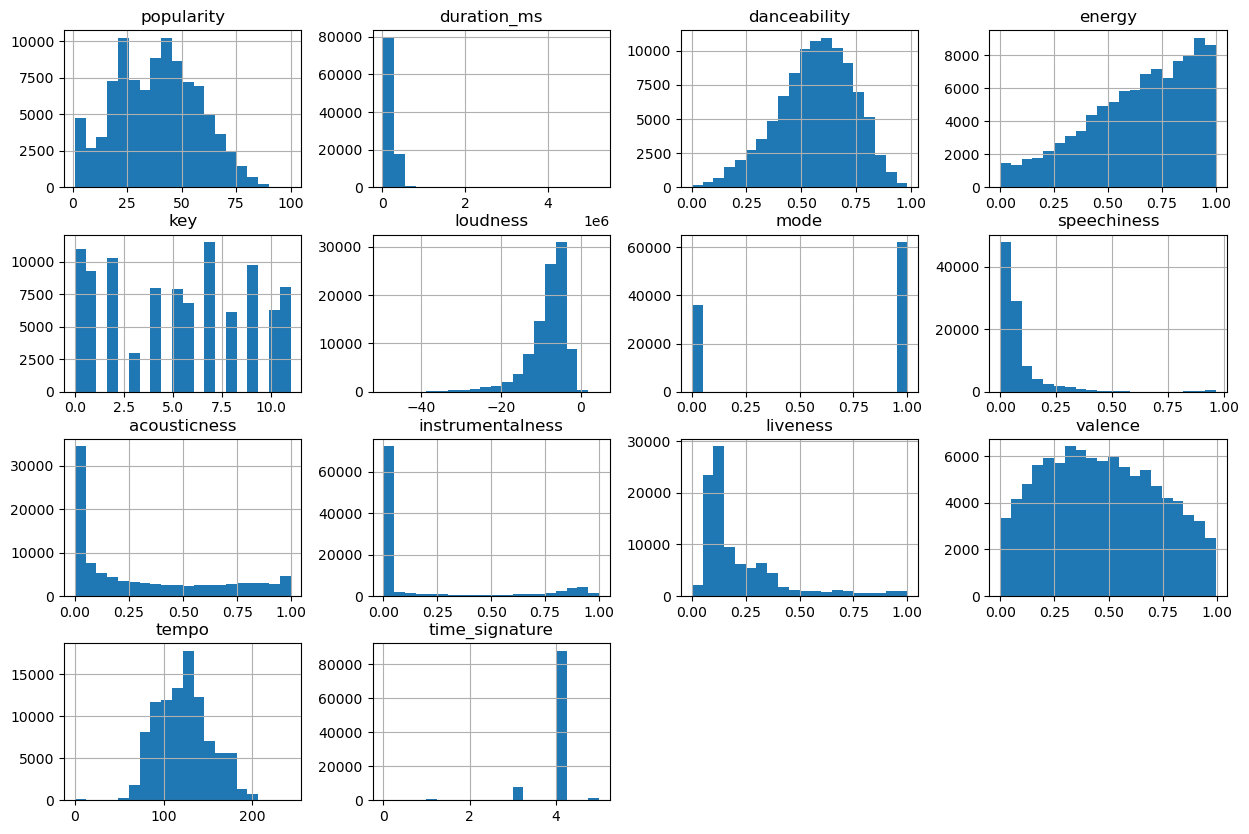

In [27]:
# Visualize numerical features without a popularity score of zero
df.hist(bins=20, figsize=(15, 10))
plt.show()

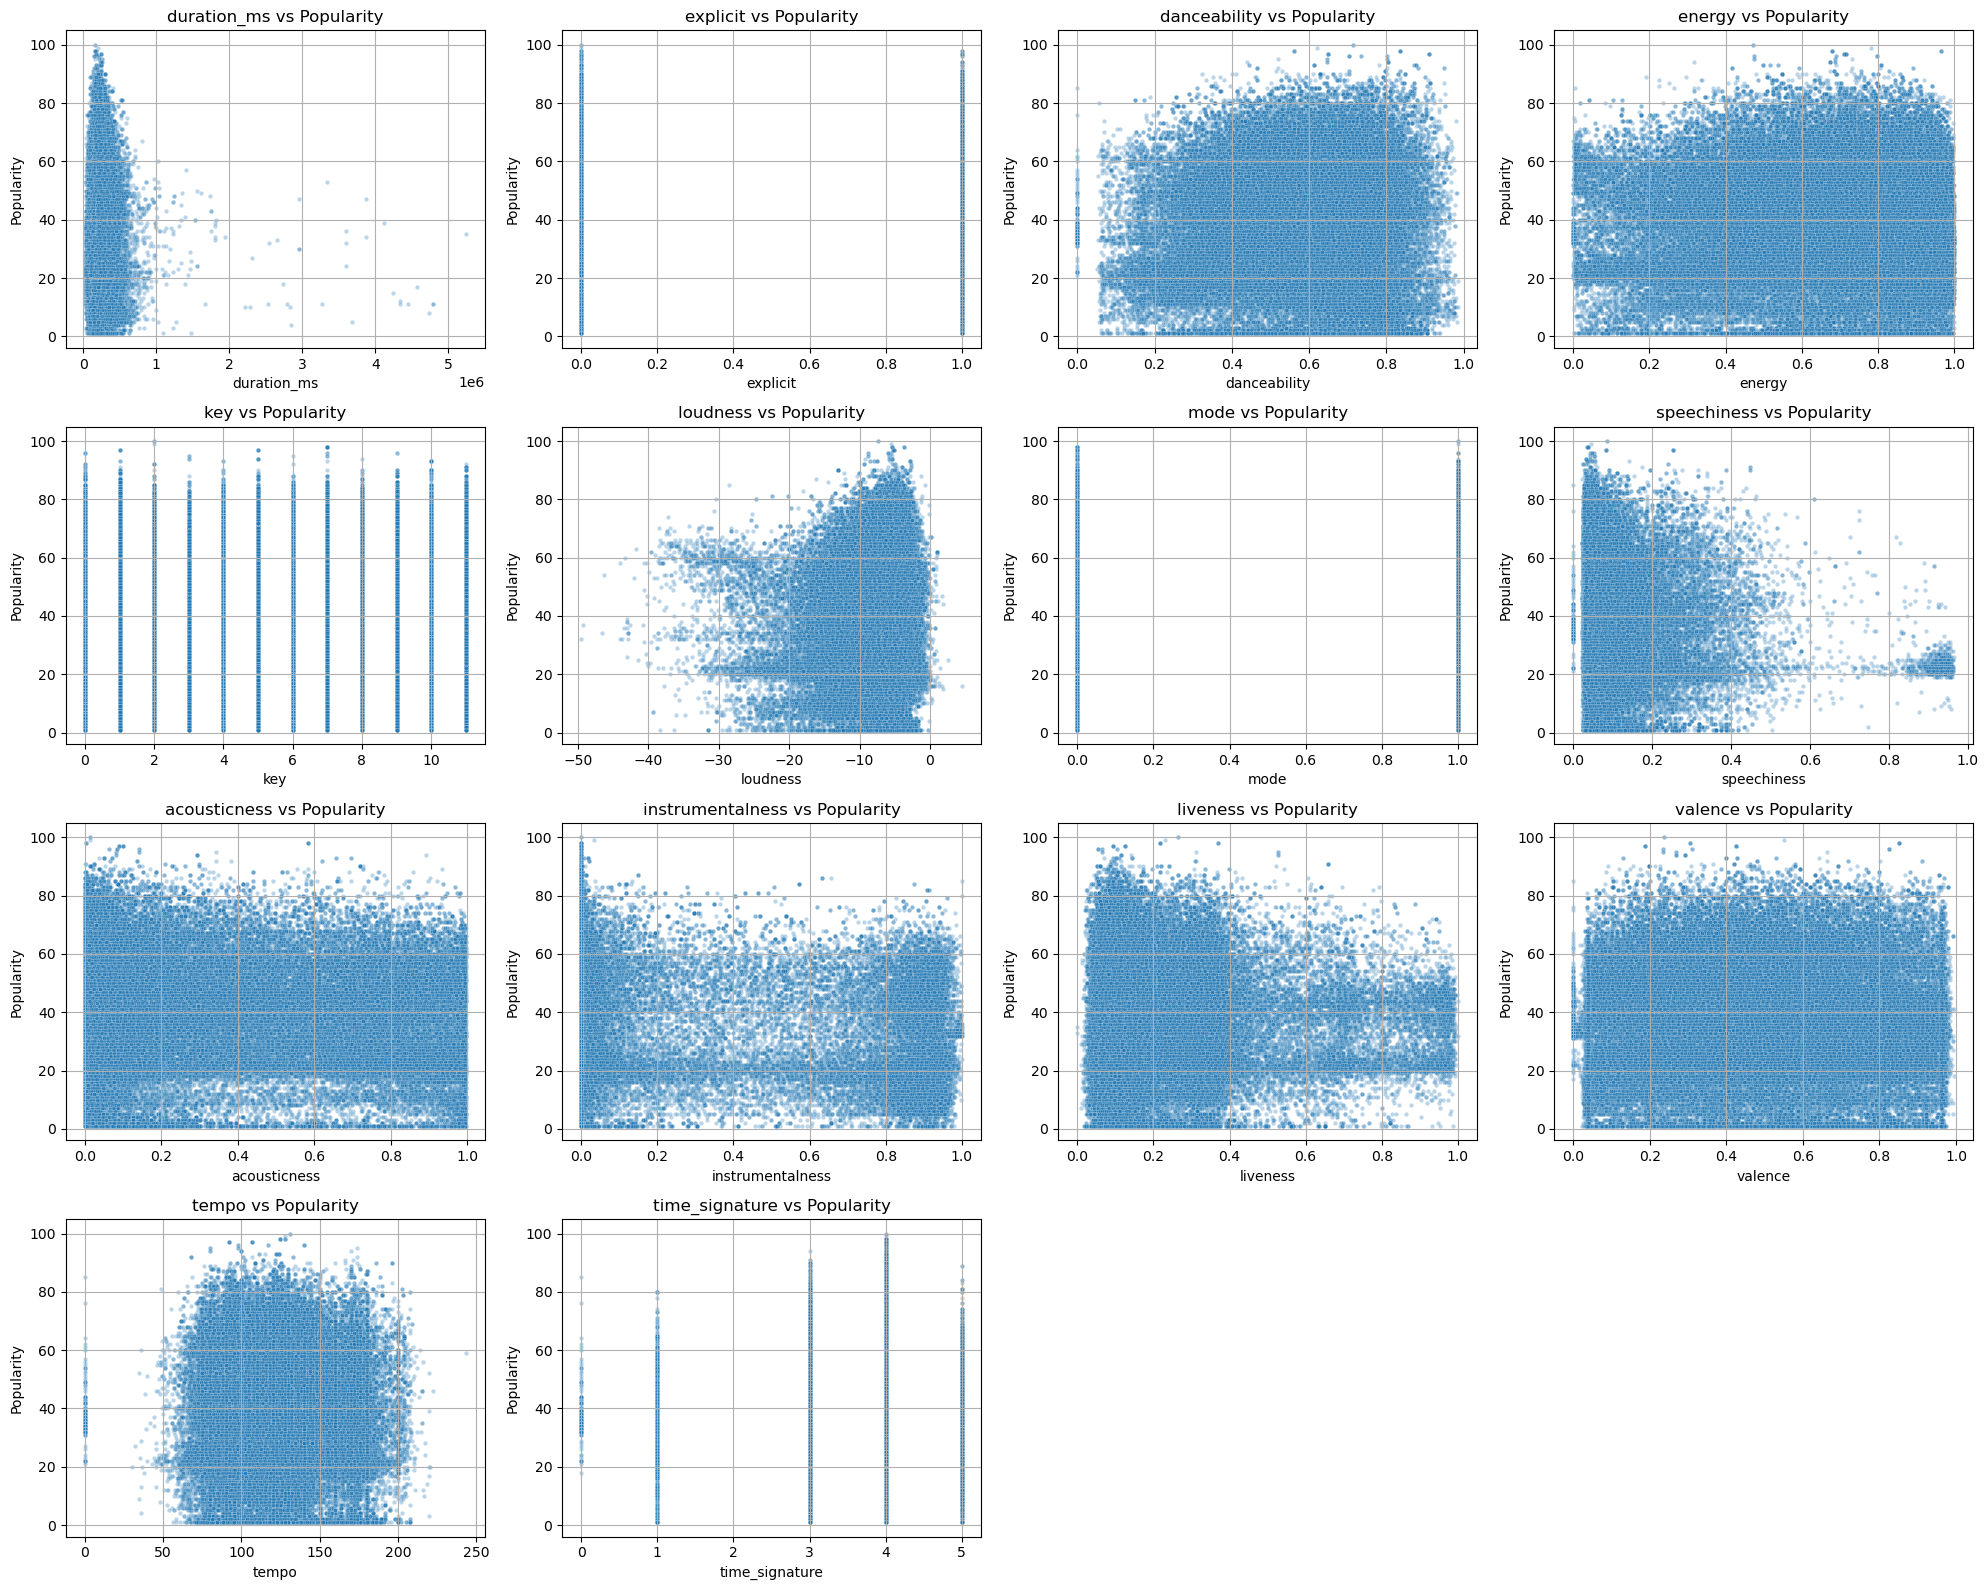

In [28]:
# Plot scatter plots of feature vs popularity without features of a popularity score of zero

features = [
    'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
    'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence',
    'tempo', 'time_signature'
]

# Calculate how many rows and columns you need for subplots
n_features = len(features)
n_cols = 4
n_rows = (n_features + n_cols - 1) // n_cols

plt.figure(figsize=(20, n_rows * 4))

for i, feature in enumerate(features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.scatterplot(x=df[feature], y=df['popularity'], alpha=0.3, s=10)
    plt.title(f'{feature} vs Popularity')
    plt.xlabel(feature)
    plt.ylabel('Popularity')
    plt.grid(True)

plt.tight_layout()
plt.show()

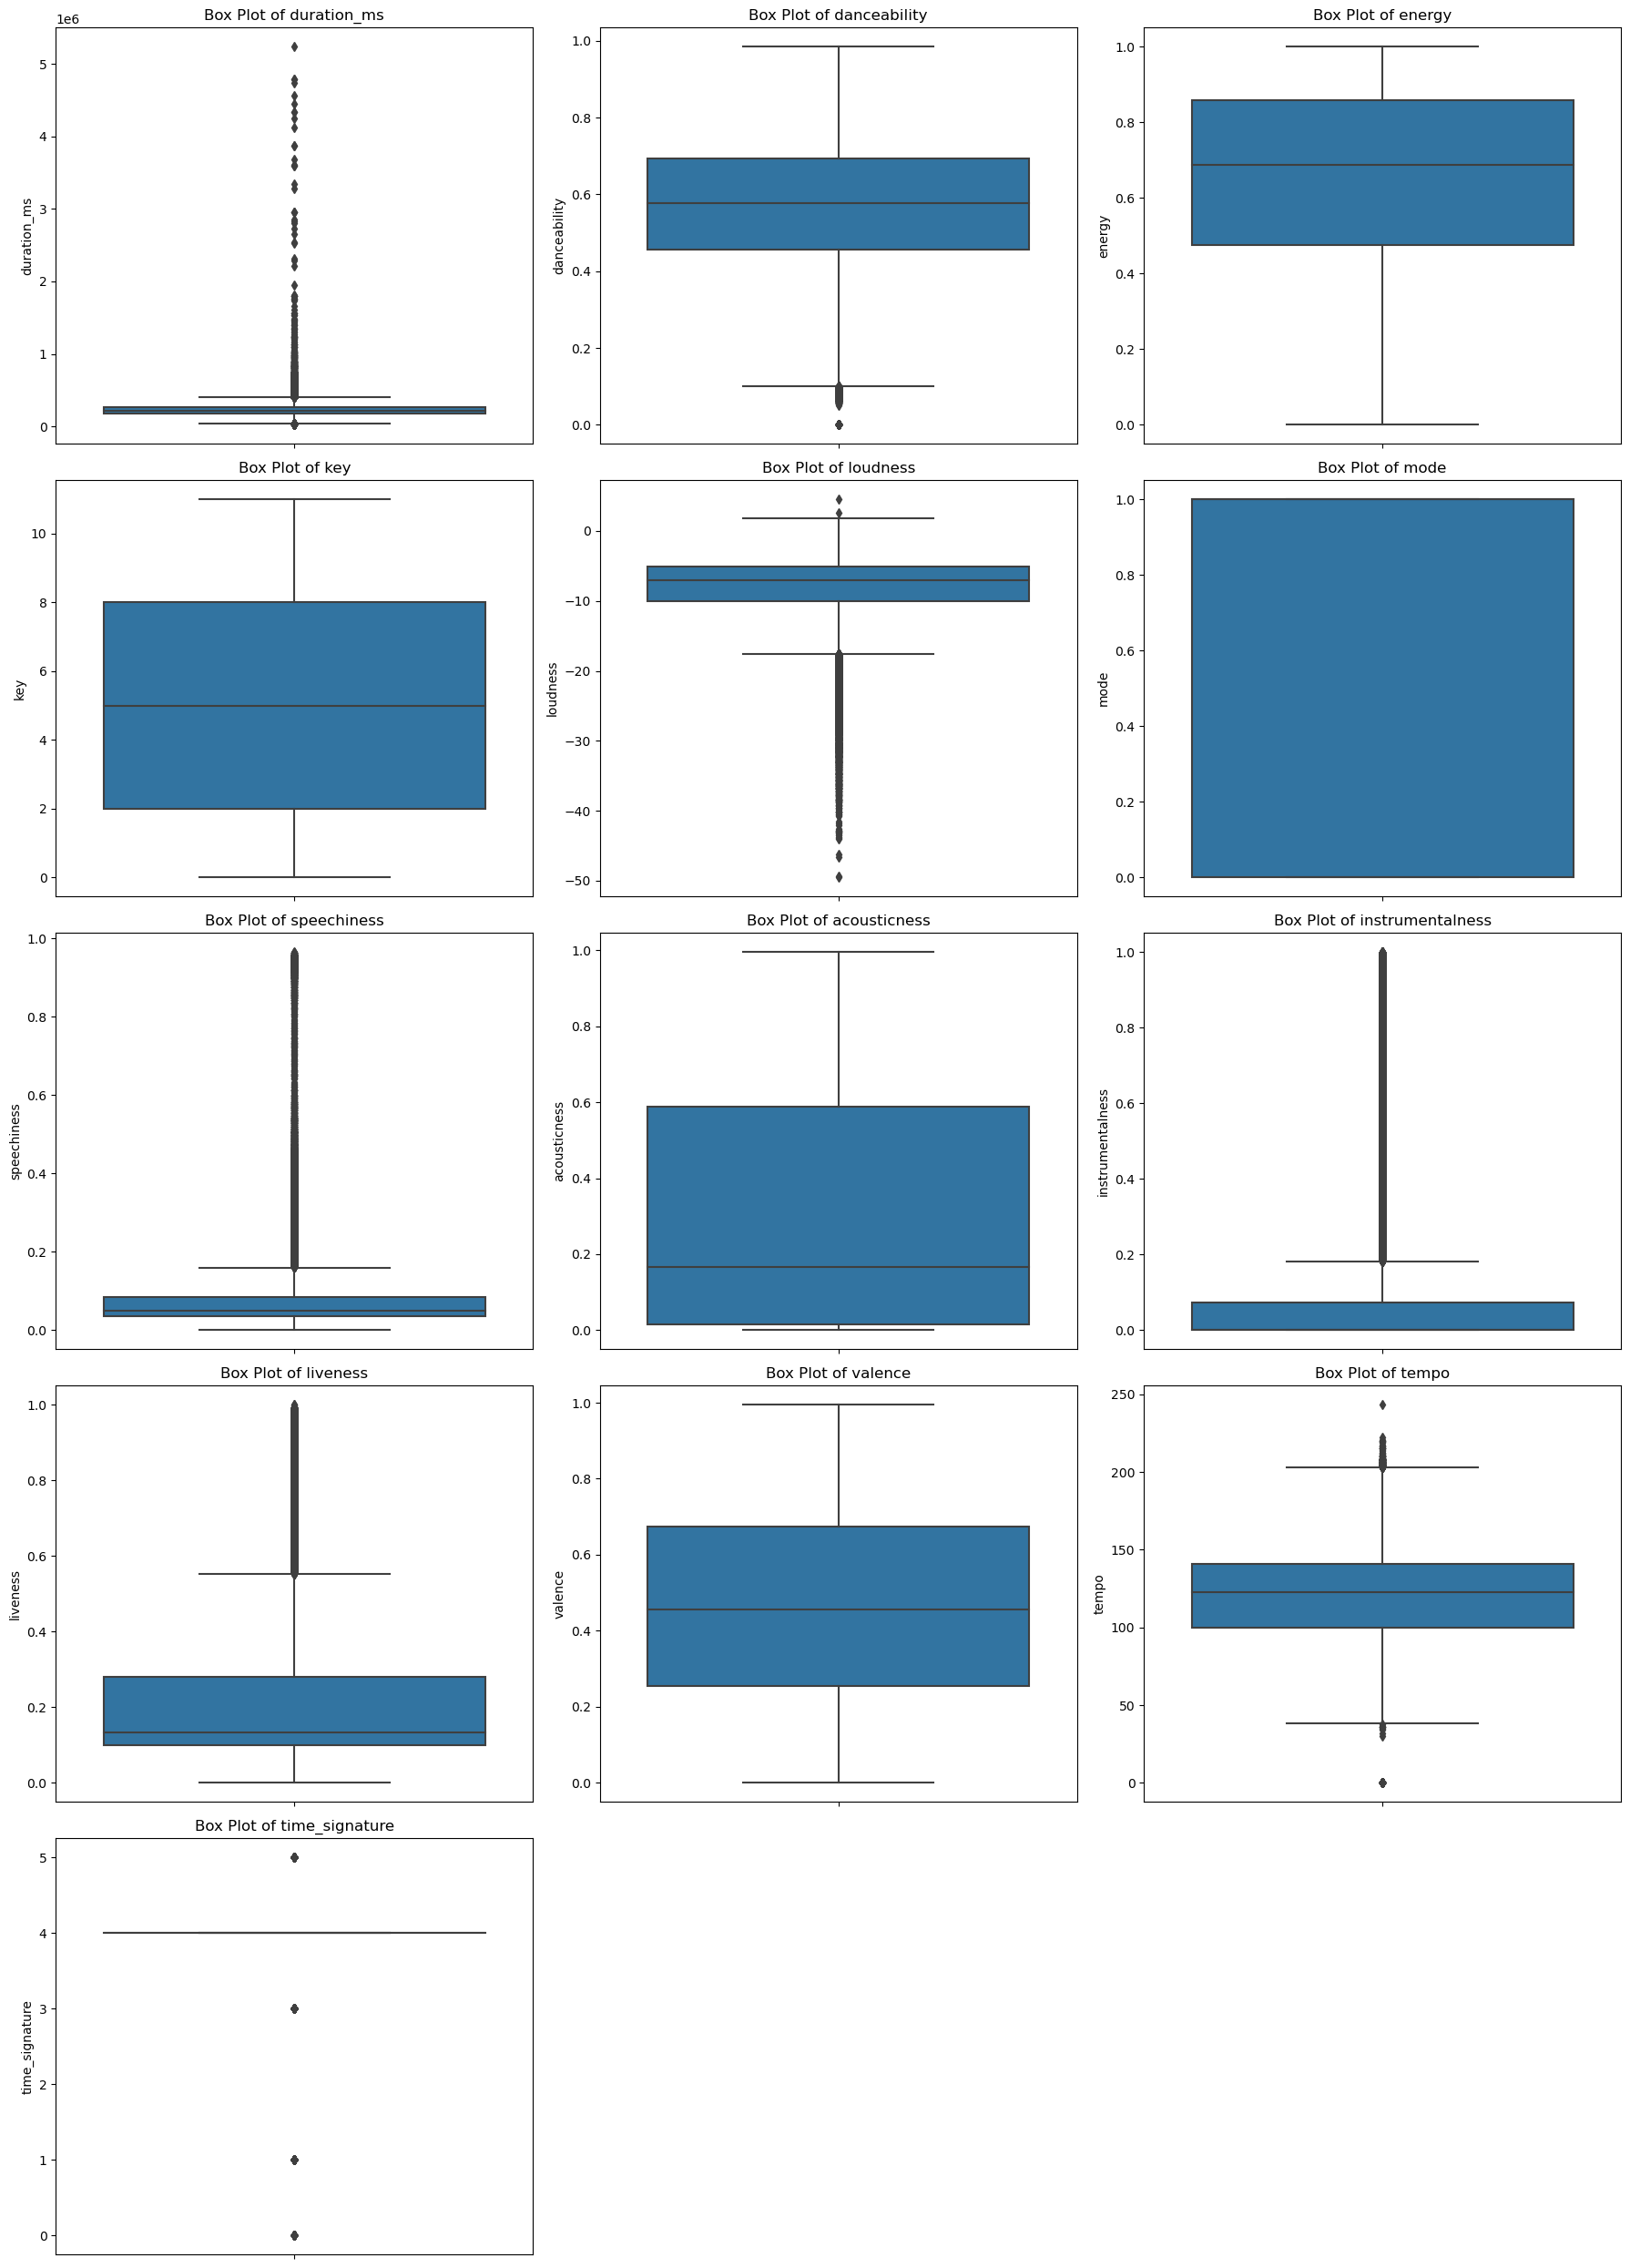

In [33]:
# Get list of numerical features except the target (popularity)
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_columns.remove('popularity')

# Set up subplots
num_cols = 3
num_rows = (len(numerical_columns) + num_cols - 1) // num_cols

plt.figure(figsize=(18, 5 * num_rows))

# Plot one box per feature
for i, column in enumerate(numerical_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()
